# STR Factor Empirical Test

## Introduction
This code file does not follow the strict (and rigorous) factor constructing framework. Instead, I just use the data to conduct the **empirical test**, to see the performance of these factors.

- Database: CSMAR           
- Testing Period: Jul 2021-Jul 2022

Later, I may test this factor using the standard framework.

## Import packages

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [111]:
df1 = pd.read_csv('daily1.csv')
df2 = pd.read_csv('daily2.csv')
df = pd.merge(df1, df2, how='outer')
df.tail()

,code,short_name,STK_MKT_DALYR-TradingDate,STK_MKT_DALYR-Turnover,TRD_Dalyr-Trddt,TRD_Dalyr-Dsmvosd,TRD_Dalyr-Dretnd,TRD_Dalyr-Dsmvtll
1141203,900957,凌云B股,2022-06-27,0.00545,2022-06-27,109112.0,-0.018212,206957.0
1141204,900957,凌云B股,2022-06-28,0.00608,2022-06-28,112608.0,0.032040,213588.0
1141205,900957,凌云B股,2022-06-29,0.00515,2022-06-29,109848.0,-0.024510,208353.0
1141206,900957,凌云B股,2022-06-30,0.00481,2022-06-30,110032.0,0.001675,208702.0
1141207,900957,凌云B股,2022-07-01,0.00518,2022-07-01,107272.0,-0.025084,203467.0


In [112]:
df['TradingMonth'] = df['STK_MKT_DALYR-TradingDate'].str[:7]
df.drop(df[df['TradingMonth']=='2022-07'].index, axis=0, inplace=True)
month_list = df['TradingMonth'].drop_duplicates().tolist()

## Empirical

### Turn20

In [113]:
Turn20 = df[['code', 'TradingMonth', 'STK_MKT_DALYR-Turnover']].groupby(['code','TradingMonth']).apply(lambda x: x.mean())

In [114]:
Turn20['Index'] = Turn20.index
Turn20['Month'] = Turn20['Index'].str[-1]
Turn20.set_index('Index', inplace=True)

In [ ]:
# data = pd.DataFrame(columns=Turn20.columns)
returns_Turn20 = pd.DataFrame(columns=['STK_MKT_DALYR-Turnover','avg_return'])
for month in month_list:
    data1 = Turn20[Turn20['Month']==month]
    data1['Label'] = pd.qcut(data1['STK_MKT_DALYR-Turnover'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])
    # data = pd.merge(data, data1, how='outer')
    
    for i in range(1,11):
        code_list = data1[data1['Label']==i]['code'].tolist()
        df3 = df[df['TradingMonth']==month]
        df4 = df3[df3.code.isin(code_list)]
        returns1 = pd.DataFrame(df4.groupby('STK_MKT_DALYR-TradingDate').apply(lambda x: x['TRD_Dalyr-Dretnd'].mean()))
        returns1.reset_index(inplace=True)
        returns1.columns = ['STK_MKT_DALYR-TradingDate','avg_return']
        returns1['Label'] = i
        returns_Turn20 = pd.merge(returns_Turn20, returns1, how='outer')

returns_Turn20.set_index('STK_MKT_DALYR-TradingDate', inplace=True)

### STR

In [116]:
STR = df[['code', 'TradingMonth', 'STK_MKT_DALYR-Turnover']].groupby(['code','TradingMonth']).apply(lambda x: np.std(x))

In [117]:
STR['Index'] = STR.index
STR['Month'] = STR['Index'].str[-1]
STR['Code'] = STR['Index'].str[0]
STR.set_index('Index', inplace=True)

In [ ]:
# data = pd.DataFrame(columns=STR.columns)
returns_STR = pd.DataFrame(columns=['STK_MKT_DALYR-Turnover','avg_return'])
for month in month_list:
    data1 = STR[STR['Month']==month]
    data1['Label'] = pd.qcut(data1['STK_MKT_DALYR-Turnover'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])
    # data = pd.merge(data, data1, how='outer')

    for i in range(1,11):
        code_list = data1[data1['Label']==i]['Code'].tolist()
        df3 = df[df['TradingMonth']==month]
        df4 = df3[df3.code.isin(code_list)]
        returns1 = pd.DataFrame(df4.groupby('STK_MKT_DALYR-TradingDate').apply(lambda x: x['TRD_Dalyr-Dretnd'].mean()))
        returns1.reset_index(inplace=True)
        returns1.columns = ['STK_MKT_DALYR-TradingDate','avg_return']
        returns1['Label'] = i
        returns_STR = pd.merge(returns_STR, returns1, how='outer')
        
returns_STR.set_index('STK_MKT_DALYR-TradingDate', inplace=True)

## Ploting

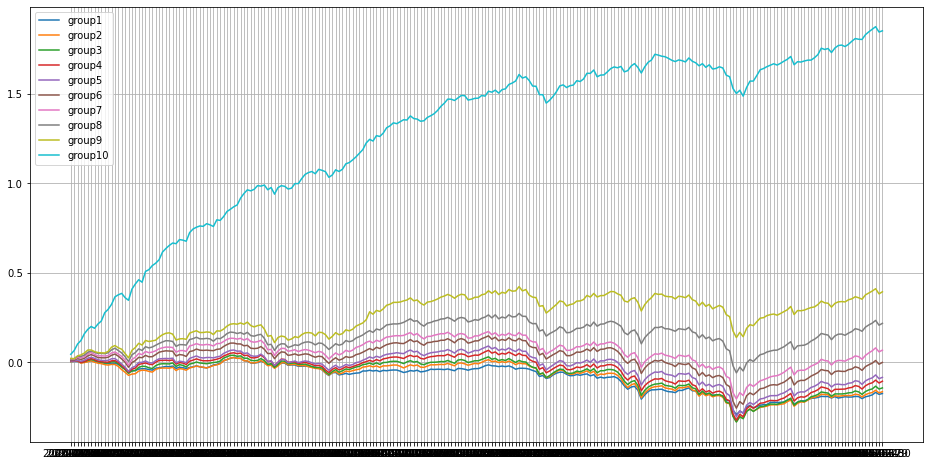

In [119]:
fig = plt.figure(figsize=(16,8))
plt.grid()
for i in range(1,11):
    name = 'group'+str(i)
    plt.plot(returns_Turn20[returns_Turn20['Label']==i]['avg_return'].cumsum(), label=name)
    plt.legend()

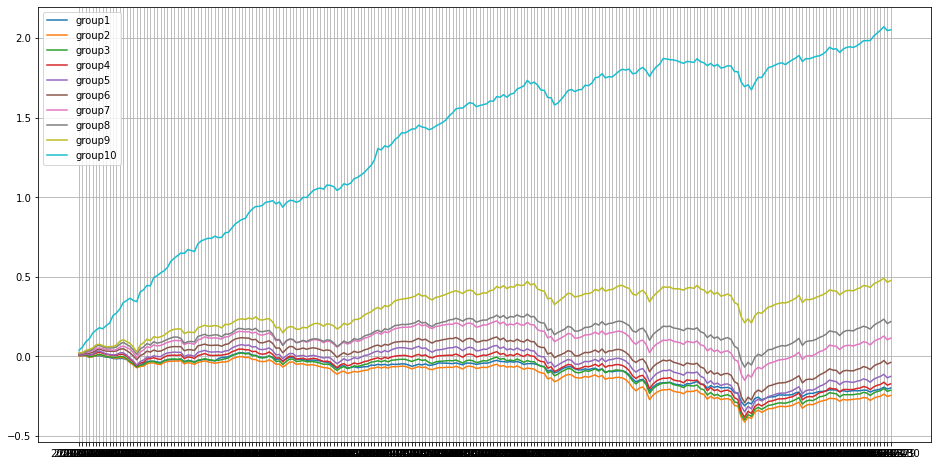

In [122]:
fig = plt.figure(figsize=(16,8))
plt.grid()
for i in range(1,11):
    name = 'group'+str(i)
    plt.plot(returns_STR[returns_STR['Label']==i]['avg_return'].cumsum(), label=name)
    plt.legend()

## Report


In [124]:
total_return_Turn20 = round((returns_Turn20[returns_Turn20['Label']==10]['avg_return'].cumsum()[-1]-1)*100,2)
total_return_STR = round((returns_STR[returns_STR['Label']==10]['avg_return'].cumsum()[-1]-1)*100,2)
print('Total return during the testing period: ')
print('-----------------------------------------')
print(f'Traditional Turn20 factor: {total_return_Turn20}%.')
print(f'Traditional STR factor: {total_return_STR}%.')

Total return during the testing period: 
-----------------------------------------
Traditional Turn20 factor: 85.24%.
Traditional STR factor: 105.27%.


## Summary

### Why high yields
The testing period covers the value correction period in China A-shares market, without tumbled period in the first half year.

### Performance
In this sample (time and A-share stocks), STR performs better than the traditional turnover factor.